<a href="https://colab.research.google.com/github/Nico-lly/INFNET-bootcamp-/blob/main/Modelos_de_Machine_Learning_Regress%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#-------------------Pré-processamento dos dados-------------------



Antes de submeter nossos dados a processamentos em modelos de machine learning, precisamos fazer alguns ajustes para que fiquem de acordo com as demandas estatísticas de cada modelo. Variando com o modelo escolhido e o tipo de dado que será manipulado.


## > > Conhecendo os dados e selecionando colunas



Para este bloco de aprendizagem, utilizaremos o o dataset Real Estate Valuation data set da UCI, e separaremos as colunas abaixo para tornar o exemplo mais didático na aplicação dos modelos de regressão.

X2 house age: Idade da construção da casa

X4 number of convenience stores: Lojas de conveniência próximas

Y house price of unit area: Preço da casa


In [ ]:
import pandas as pd
file = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx')
regr_data = file[['X2 house age','X4 number of convenience stores', 'Y house price of unit area']]
regr_data.head()

,X2 house age,X4 number of convenience stores,Y house price of unit area
0,32.0,10,37.9
1,19.5,9,42.2
2,13.3,5,47.3
3,13.3,5,54.8
4,5.0,5,43.1


##Escalonamento


Escalonar é colocar todos os valores numa escala sem distorcer a distância da distribuição entre os valores(variância).
Antes de inserir os dados em um modelo, é importante ajusta-los em uma mesma escala ("régua") para evitar enviesamentos e tornar possível uma comparação entre esses valores de forma mais justa. Existem muitas formas de escalonamento, mas as mais utilizadas em ciência de dados são:

###Padronização

É utilizado apenas em distribuições normais (gausiana), geralmente é utilizado o cálculo do Z-Score, que transforma a média em zero e o desvio padrão em um:

                  Z = x - mean(x) / sdev(x)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std = StandardScaler().fit_transform(file)
std

array([[-1.72787215, -0.82472165,  1.25562833, ...,  1.12542986,
         0.44876222, -0.00590088],
       [-1.71950473, -0.82472165,  0.15708622, ...,  0.91244418,
         0.40113894,  0.3105072 ],
       [-1.71113731,  1.54224386, -0.38779067, ...,  1.48686011,
         0.68818339,  0.6857819 ],
       ...,
       [ 1.71113731,  0.35876111,  0.09556786, ...,  0.82289338,
         0.42397202,  0.19277396],
       [ 1.71950473, -0.52885105, -0.84478419, ..., -0.18475479,
         0.4768143 ,  1.06841493],
       [ 1.72787215,  1.24637326, -0.98539758, ...,  0.42757905,
         0.63534112,  1.90726426]])

###Normalização

Pode ser utilizada em qualquer distribuição de dados, colocando as variáveis entre um intervalo de -1 à 1.
Existem algumas formas de calcular a normalização:


*   Min - Max:

             Y = x - mean(x) / [max(x) - min(x)]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
minmax = MinMaxScaler().fit_transform(file)
minmax

array([[0.        , 0.27272729, 0.73059361, ..., 0.61694135, 0.71932284,
        0.27570519],
       [0.00242131, 0.27272729, 0.44520548, ..., 0.5849491 , 0.71145137,
        0.31483167],
       [0.00484262, 1.        , 0.30365297, ..., 0.67123122, 0.75889584,
        0.36123749],
       ...,
       [0.99515738, 0.63636365, 0.42922374, ..., 0.57149782, 0.71522536,
        0.30027298],
       [0.99757869, 0.36363635, 0.18493151, ..., 0.42014057, 0.72395946,
        0.40855323],
       [1.        , 0.90909094, 0.14840183, ..., 0.51211827, 0.75016174,
        0.51228389]])

##> > De volta aos dados

Para esses valores, escolhemos a **normalização**, pois não temos uma distribuição normal dos valores.
Depois transformaremos os arrays dessa saída de volta em um dataframe e renomearemos as colunas:

X2 house age >> Age

X4 number of convenience stores >> Convenience_Store

Y house price of unit area >> Price

In [ ]:
from sklearn.preprocessing import MinMaxScaler
df_regr = pd.DataFrame(MinMaxScaler().fit_transform(regr_data))
df_regr.columns = ['Age', 'Convenience_Store', 'Price']
df_regr.head()

,Age,Convenience_Store,Price
0,0.730594,1.0,0.275705
1,0.445205,0.9,0.314832
2,0.303653,0.5,0.361237
3,0.303653,0.5,0.429481
4,0.114155,0.5,0.323021


#---------------------MODELOS DE REGRESSÃO------------------------





Quando falamos de modelos de regressão, estamos falando sobre encontrar uma equação, dada distribuição dos dados, que descreva a melhor média entre todos os dados, afim de identificar um padrão de comportamento 
 e prever uma possível tentência.


##Correlação e Causalidade

Correlação: Mede a extenção da interdependência entre variáveis.

Causalidade: Relação de causa e efeito.

##Teste de força da correlação

###Correlação de Pearson

Mede a correlação linear (e apenas linear nos parâmetros e na relação, ao contrário d polinomial) entre duas variáveis com valores entre -1 à 1, onde:
*   1 = Correlação linear positiva total
*   0 = Sem correlação linear
*  -1 = Correlação linear negativa total


In [ ]:
# Por defaut, apresenta a correlação de Pearson
df_regr.corr()

,Age,Convenience_Store,Price
Age,1.000000,0.049593,-0.210567
Convenience_Store,0.049593,1.000000,0.571005
Price,-0.210567,0.571005,1.000000




####P-Value

Mede a probabilidade da correlação descoberta ser estatísticamente significativa.

Ao realizar o teste de hipótese (H0 - H1), verifica se o valor da correlação está ou não contido na região de rejeição que, por sua vez, é determinado pelo nível de significância.

Desta forma, se o P-value é menor que o nível de significância, rejeitamos a hipótese nula H0 (nesse caso, de que a correlação É estatisticamente significativa), e assume-se a hipótese alternativa H1 (nesse caso, que a correlação NÃO É estatísticamente significativa).







In [ ]:
import numpy as np
from scipy import stats

In [ ]:
pearson_coef, p_value = stats.pearsonr(df_regr['Convenience_Store'], df_regr['Price'])
print(pearson_coef, p_value)

0.5710049111111485 3.413483340495673e-37


##Métricas de avaliação de Regressão

Ao criar um modelo, é preciso testar se ele é preciso(ou quão preciso ele é) para estimar as nossas predições, se eles são estatísticamente significantivos, ou seja, capazes de generalizações.

###R Quadrado (R^2):

É o coeficiente de determinação, informando a eficiência de precisão do seu modelo em porcentagem, dado as operações realizadas com seu conjunto de dados (train e test).

Quanto maior, mais preciso e varia entre 0 e 1


In [ ]:
from sklearn.metrics import r2_score

###Mean Absolut Error (MAE):

Calcula a média de todos os erros (variâncias), informando quantos pontos para mais ou para menos, sua predição tende a variar, podendo desta forma, ser um número positivo ou negativo. Quanto mais próximo de zero o MAE, mais preciso é o modelo.
(ex.: Se o valor real é igual a 4 e o modelo previu o valor 6, o MAE é de 2 pontos)

In [ ]:
from sklearn.metrics import mean_absolute_error

##Mean Squared Error (MSE)

Calcula a média de todas as variâncias, mas enfatiza os valores outliers(valores extremos na distribuição). Sempre retorna um valor positivo e com maior influência desses pontos com maior variância.
Sendo assim, quando o MSE está muito alto, quer dizer que seu modelo não está levando muito em consideração a variância da distribuição caracterizando um *underfiting*; 
Enquanto um MSE igual a zero quer dizer sua regressão não encontrou uma linha média, mas uma linha que passasse por todos os pontos da sua distribuição, caracterizando desta forma, um *overfitting*. 


Para deixar o resultado dessa métrica na mesma escala que as apresentada acima, tiramos sua raiz quadrada, obtendo o **RMSE**. 


In [ ]:
from sklearn.metrics import mean_squared_error


#Regressão Linear
 
Analisa a tendência linear de uma relação entre uma variável dependente (target) e uma ou mais variáveis independentes (predictive). Quando existem mais de uma variável, ela é chamada de *Regressão Linear Multipla*.

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

###Simples

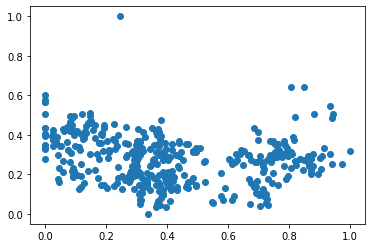

In [ ]:
# Defina as Variáveis X e Y 

X = df_regr[['Age']]
Y = df_regr['Price']

# Verifique a correlação entre as suas variáveis em relação ao seu target
#import matplotlib.pyplot as plt
plt.scatter(x = X, y = Y)


In [ ]:
# Divida seus dados em treino e teste

#from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# Normalize ou padronize as colunas necessárias (aqui não será necessário)

In [ ]:
# Crie seu objeto de regressão linear

lr = LinearRegression()

In [ ]:
# Treine seu modelo com as variáveis de treino

lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Verifique as métricas de precisão para treino

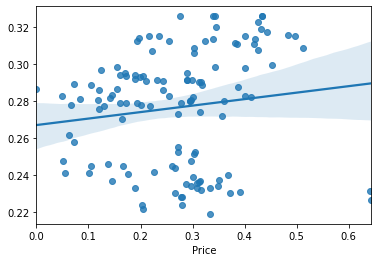

In [ ]:
# Faça a predição

Yhat = lr.predict(x_test)
Yhat

#import seaborn as sns
sns.regplot(x = y_test, y = Yhat, data = df_regr)


In [ ]:
# Verifique as métricas de precisão para teste

#from sklearn.metrics import r2_score
#from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import mean_squared_error

In [ ]:
print('R2: ', r2_score(y_test, Yhat))
print('MAE: ', mean_absolute_error(y_test, Yhat))
print('MSE: ', mean_squared_error(y_test, Yhat))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, Yhat)))

R2:  -8.405027617253147e-05
MAE:  0.09456214382684353
MSE:  0.014111475996715821
RMSE:  0.11879173370532067


###Multipla

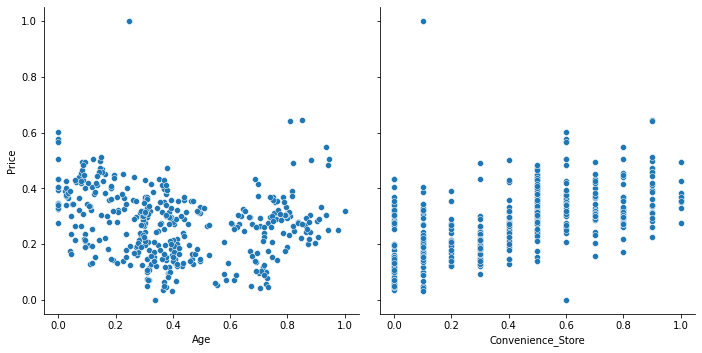

In [ ]:
# Defina as Variáveis X e Y 
X = df_regr[['Age','Convenience_Store']]
Y = df_regr[['Price']]

# Verifique a correlação entre as suas variáveis em relação ao seu target
#import seaborn as sns
g = sns.PairGrid(df_regr, y_vars=['Price'], x_vars=['Age','Convenience_Store'], height=5)
g.map(sns.scatterplot)

In [ ]:
# Divida seus dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [ ]:
# Normalize ou padronize as colunas necessárias (como visto a cima)

# Crie seu objeto de regressão linear
lr = LinearRegression()

# Treine seu modelo com as variáveis de treino

lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

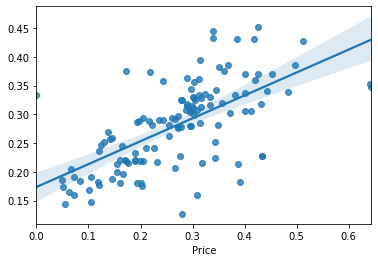

In [ ]:
# Verifique as métricas de precisão para treino

# Faça a predição

Yhat = lr.predict(x_test)

sns.regplot(x = y_test, y = Yhat, data = df_regr)

In [ ]:
# Verifique as métricas de precisão para teste 

#from sklearn.metrics import r2_score
#from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import mean_squared_error

In [ ]:
print('R2: ', r2_score(y_test, Yhat))
print('MAE: ', mean_absolute_error(y_test, Yhat))
print('MSE: ', mean_squared_error(y_test, Yhat))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, Yhat)))

R2:  0.40034842622957445
MAE:  0.06841604831839919
MSE:  0.008461257618614616
RMSE:  0.09198509454588072


##Regressão Polinomial

É uma regressão linear em que os valores da variável independente (predictive) são expandidos em polinômios.

Encontra a tendência curvilinha da relação entre as variáveis target e predict.

A ordem ou grau da função que determina essa relação é maior que 1 (quadrática, cúbica e etc)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
#from sklearn.linear_model import LinearRegression

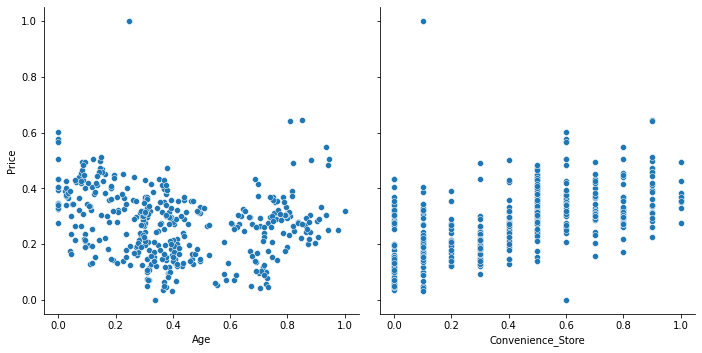

In [ ]:
# Defina as Variáveis X e Y 
X = df_regr[['Age','Convenience_Store']]
Y = df_regr[['Price']]

# Verifique a correlação entre as suas variáveis em relação ao seu target
#import seaborn as sns
g = sns.PairGrid(df_regr, y_vars=['Price'], x_vars=['Age','Convenience_Store'], height=5)
g.map(sns.scatterplot)

In [ ]:
# Crie o modelo polinomial e transforme suas variáveis preditivas (x) em polinômios

poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[1.        , 0.73059361, 1.        , 0.53376702, 0.73059361,
        1.        ],
       [1.        , 0.44520548, 0.9       , 0.19820792, 0.40068493,
        0.81      ],
       [1.        , 0.30365297, 0.5       , 0.09220512, 0.15182648,
        0.25      ],
       ...,
       [1.        , 0.42922374, 0.7       , 0.18423302, 0.30045662,
        0.49      ],
       [1.        , 0.18493151, 0.5       , 0.03419966, 0.09246575,
        0.25      ],
       [1.        , 0.14840183, 0.9       , 0.0220231 , 0.13356164,
        0.81      ]])

In [ ]:
# Divida seus dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

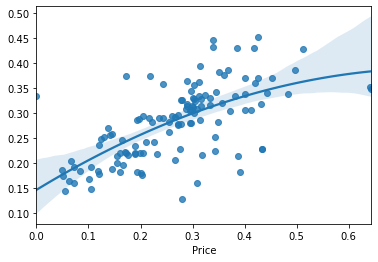

In [ ]:
# Crie o modelo de regressão linear e realize o calculo de regressão

lr = LinearRegression()
lr.fit(x_train, y_train)

# Faça a predição

yhat = lr.predict(x_test)

sns.regplot(x = y_test, y = yhat, data = df_regr, order = 2)

In [ ]:
# Avalie o seu modelo 

#from sklearn.metrics import r2_score
#from sklearn.metrics import mean_absolute_error
#from sklearn.metrics import mean_squared_error

In [ ]:
print('R2: ', r2_score(y_test, yhat))
print('MAE: ', mean_absolute_error(y_test, yhat))
print('MSE: ', mean_squared_error(y_test, yhat))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, yhat)))

R2:  0.40034842622957445
MAE:  0.06841604831839919
MSE:  0.008461257618614616
RMSE:  0.09198509454588072


##Regressão de Ridge

É um modelo de regressão linear que realiza a **regularização** dos dados, afim de evitar o overfitting.

Esta regularização reduz a variância através da penalização dos maiores coeficientes da regressão durante o treino (train).

Quanto maior o valor do Alpha, maior a penalização, mas alphas pequenos são ideais para que o seu modelo não passe de um overfitting para um underfitting.

In [ ]:
from sklearn.linear_model import Ridge

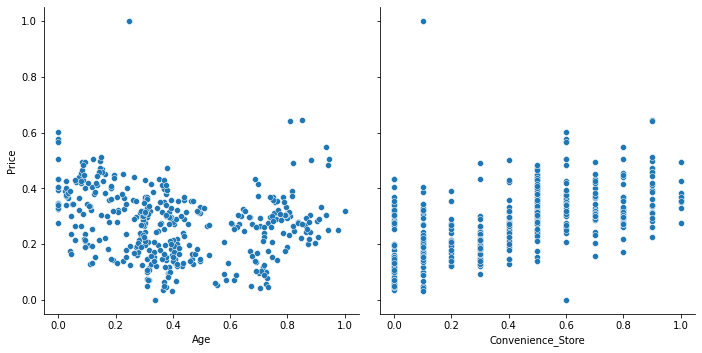

In [ ]:
# Defina as Variáveis X e Y 
X = df_regr[['Age','Convenience_Store']]
Y = df_regr['Price']

# Verifique a correlação entre as suas variáveis em relação ao seu target
#import seaborn as sns
g = sns.PairGrid(df_regr, y_vars=['Price'], x_vars=['Age','Convenience_Store'], height=5)
g.map(sns.scatterplot)


In [ ]:
# Divida seus dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [ ]:
# Crie o modelo de regressão de Ridge e realize o calculo de regressão

RR = Ridge(alpha = 1)
RR.fit(x_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

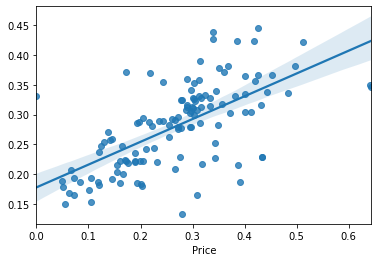

In [ ]:
# Faça a predição

yhat = RR.predict(x_test)

sns.regplot(x = y_test, y = yhat, data = df_regr)

In [ ]:
# Avalie seu modelo 

print('R2: ', r2_score(y_test, yhat))
print('MAE: ', mean_absolute_error(y_test, yhat))
print('MSE: ', mean_squared_error(y_test, yhat))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, yhat)))

R2:  0.3988977082730808
MAE:  0.06851549540212373
MSE:  0.00848172766972223
RMSE:  0.09209629563517867
